In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [6]:
#check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_dataset = df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
final_dataset['Year']=2020 -final_dataset['Year']
final_dataset.head()

C:\Users\HNAOY\AppData\Local\Temp/ipykernel_16188/3438193017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Year']=2020 -final_dataset['Year']


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,6,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
final_dataset.rename(columns ={'Year':'no_year'},inplace =True)

c:\users\hnaoy\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [13]:
final_dataset =pd.get_dummies(final_dataset,drop_first = True)
final_dataset.head()

,no_year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,3.35,5.59,27000,0,0,1,0,1
1,7,4.75,9.54,43000,0,1,0,0,1
2,3,7.25,9.85,6900,0,0,1,0,1
3,9,2.85,4.15,5200,0,0,1,0,1
4,6,4.60,6.87,42450,0,1,0,0,1


In [14]:
final_dataset.corr()['Selling_Price'].sort_values(ascending =False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
no_year                  -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

In [15]:
import seaborn as sns

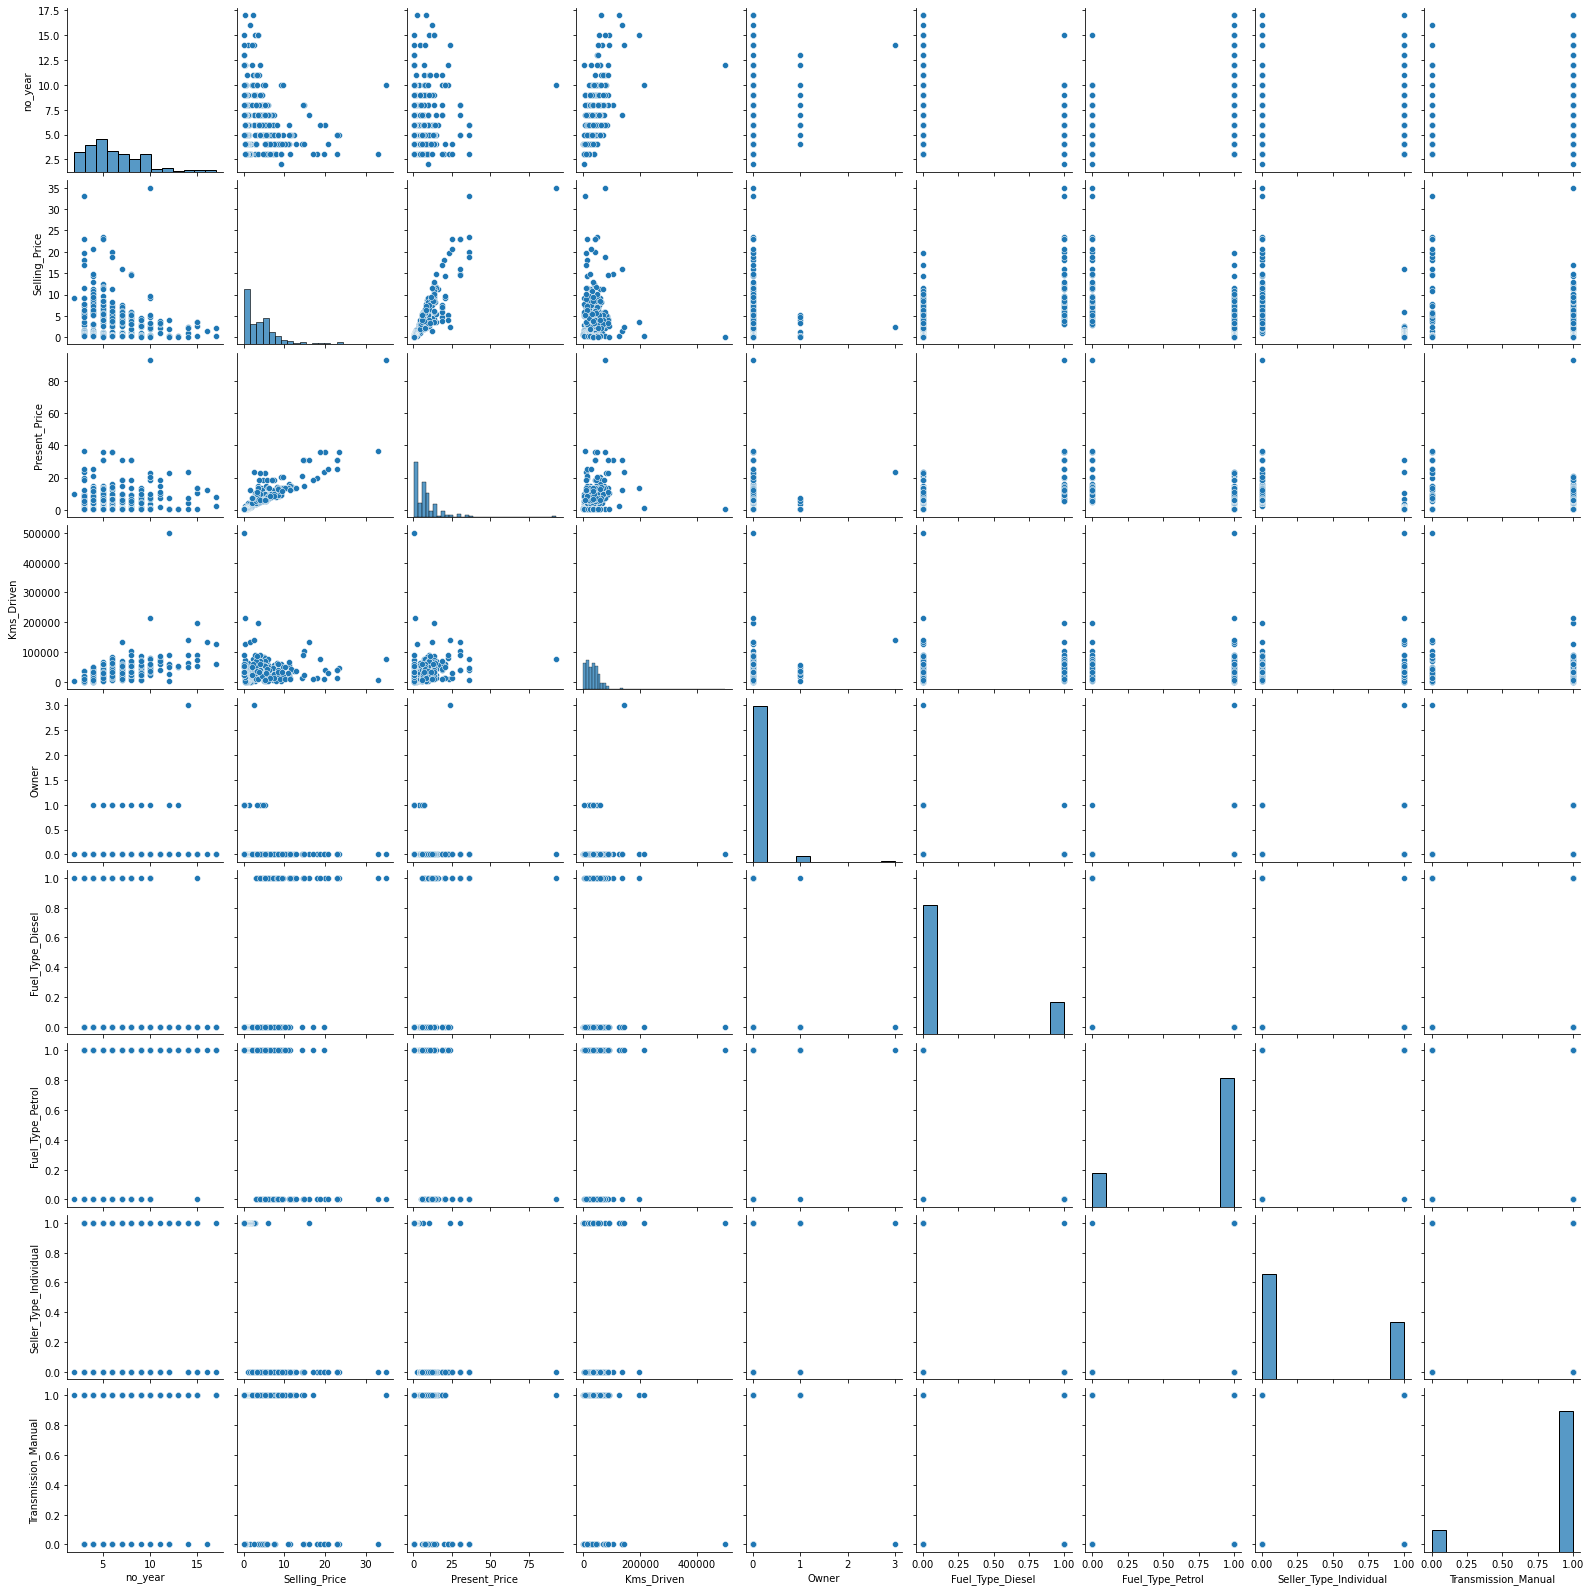

In [16]:
sns.pairplot(final_dataset)

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

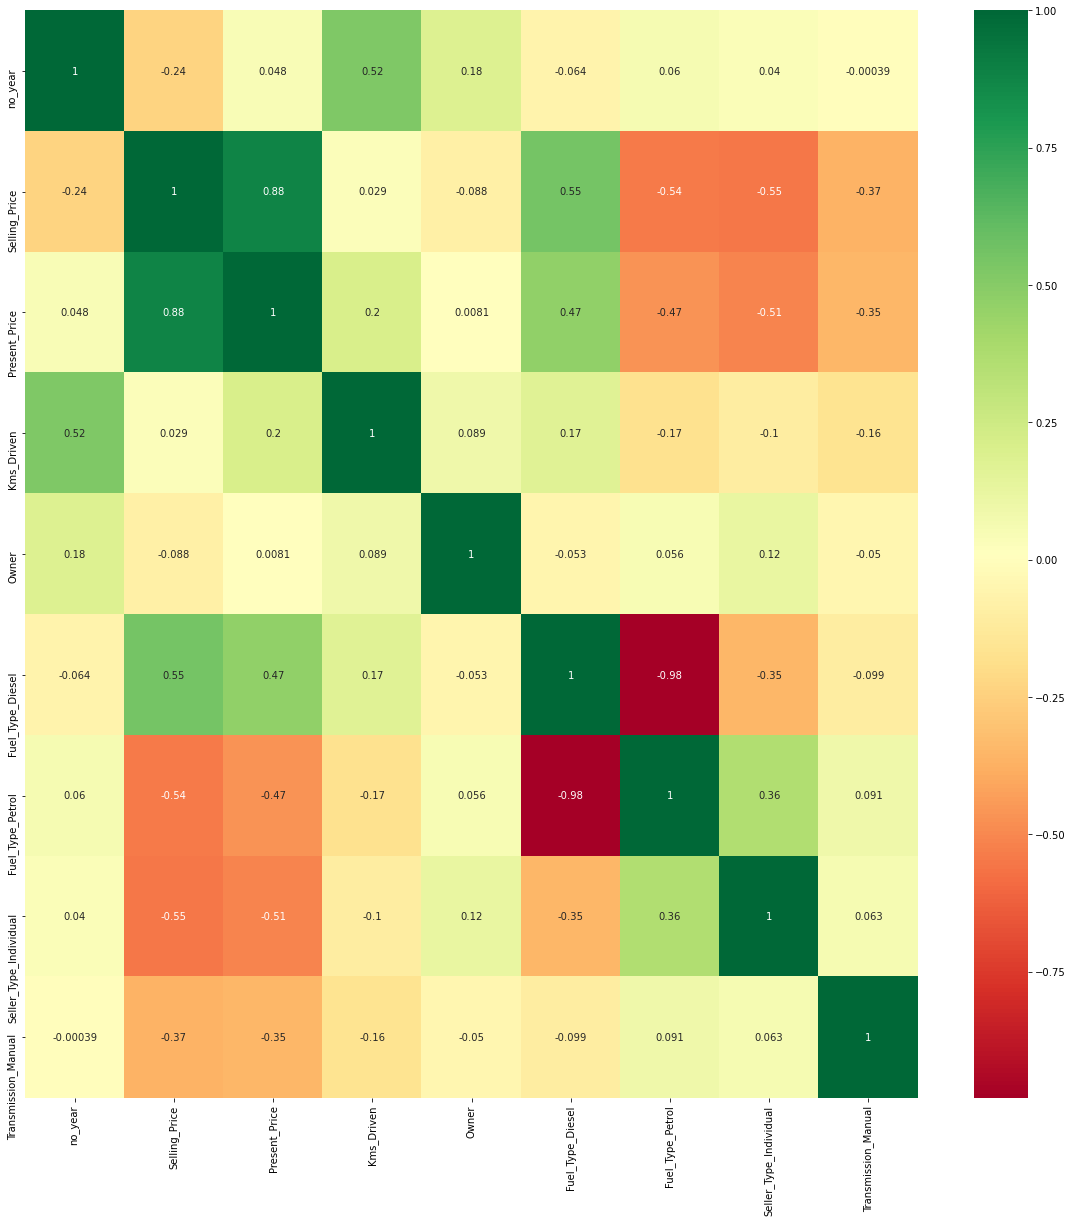

In [18]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize =(20,20))
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot = True,cmap ='RdYlGn')

In [19]:
final_dataset.head()

,no_year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,3.35,5.59,27000,0,0,1,0,1
1,7,4.75,9.54,43000,0,1,0,0,1
2,3,7.25,9.85,6900,0,0,1,0,1
3,9,2.85,4.15,5200,0,0,1,0,1
4,6,4.60,6.87,42450,0,1,0,0,1


In [20]:
X =final_dataset.loc[: , final_dataset.columns !='Selling_Price']
y = final_dataset.iloc[:,1]

In [23]:
X.head()

,no_year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,5.59,27000,0,0,1,0,1
1,7,9.54,43000,0,1,0,0,1
2,3,9.85,6900,0,0,1,0,1
3,9,4.15,5200,0,0,1,0,1
4,6,6.87,42450,0,1,0,0,1


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.07825292 0.38082751 0.0398158  0.00090533 0.22153837 0.01255748
 0.1345631  0.13153949]


In [27]:
X.head()

,no_year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,5.59,27000,0,0,1,0,1
1,7,9.54,43000,0,1,0,0,1
2,3,9.85,6900,0,0,1,0,1
3,9,4.15,5200,0,0,1,0,1
4,6,6.87,42450,0,1,0,0,1


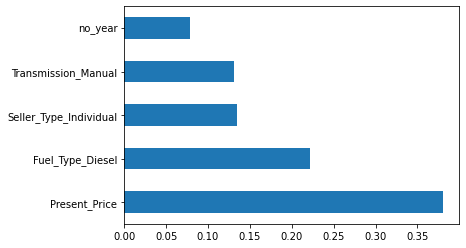

In [30]:
feat_importance = pd.Series(model.feature_importances_,index = X.columns)
feat_importance.nlargest(5).plot(kind = 'barh')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2)

In [32]:
X_train.shape

(240, 8)

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [37]:
###Hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start =100,stop = 1200,num =12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num =6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
rf_random =RandomizedSearchCV(rf,random_grid,scoring ='neg_mean_squared_error',n_iter =10,cv =5,verbose =2,random_state = 42,n_jobs =1)

In [42]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
pred = rf_random.predict(X_test)
pred

array([ 1.15654109,  9.32345691,  0.41589387,  4.52131357, 10.32268726,
        1.46301047,  2.85012136,  5.97387305,  0.72091025,  0.32454317,
        1.17437895,  3.78743835,  0.24196307,  4.39435346,  5.47708086,
        2.80053789,  3.00989435,  4.10709046,  4.91101568,  7.83331527,
        4.0602361 ,  5.46781798,  2.90904589,  0.36310202,  4.41816407,
        5.44874255,  0.72053869,  2.8253245 , 10.7550117 ,  4.38515144,
        0.35721449,  0.6751719 , 10.04712253,  3.48952923,  9.00923861,
        0.24670814,  0.38955115,  8.47292991, 10.38019335,  4.62294753,
        0.24704939,  5.71426645,  5.50133762,  0.63186588,  2.92528681,
        4.08996928,  5.58297683,  2.76122787,  6.05989443,  0.24163215,
        4.69333672,  4.96008769,  0.37089711, 19.21853209,  2.59215872,
        0.31748718,  5.47708086,  6.32848351,  0.41493791,  0.31238726,
        5.604141  ])

c:\users\hnaoy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

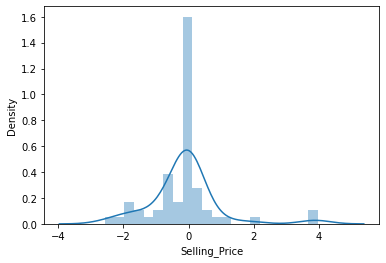

In [46]:
sns.distplot(y_test-pred)

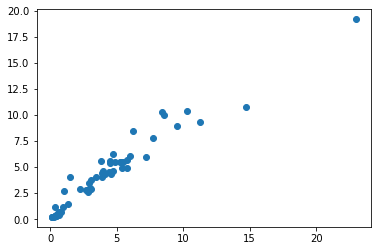

In [47]:
plt.scatter(y_test,pred)

In [48]:
import pickle
file =open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random,file)